In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from random import choice
from numpy import mean, array

rcParams['figure.figsize'] = 10, 5

In [2]:
earnings=pd.read_csv('./bases/earnings_female.csv')
employed=pd.read_csv('./bases/employed_gender.csv')
jobs=pd.read_csv('./bases/jobs_gender.csv')

In [3]:
labels=[]

for index, row in earnings.iterrows():
    if row['group'] not in labels:
        labels.append(row['group']) 

In [4]:
values=[15,0,0,0,0,0,0]

for k in range(len(values)-1):
    values[k+1]=values[k]+values[0]
    
colors=['b','g','r','c','m','y','slategrey']

means={}

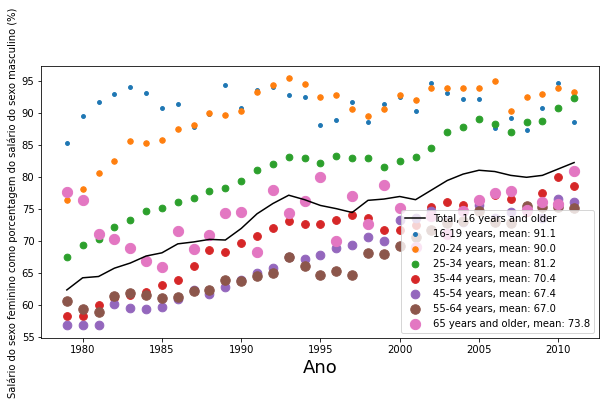

{'Total, 16 years and older': 74.18181818181819, '16-19 years': 91.06666666666666, '20-24 years': 90.0, '25-34 years': 81.24242424242425, '35-44 years': 70.43636363636364, '45-54 years': 67.39696969696969, '55-64 years': 66.96060606060605, '65 years and older': 73.77272727272727}


In [5]:
df=earnings[earnings.group == 'Total, 16 years and older']
Mean=mean(array(df.percent))
means['Total, 16 years and older']=Mean
plt.plot(df.Year, df.percent, label='Total, 16 years and older', c='k')

j=0

for i in labels[1:]:
    s=(values[j])
    c=choice(colors)
    colors.remove(c)
    
    df=earnings[earnings.group == i]
    Mean=mean(array(df.percent))
    means[i]=Mean
    st=round(means.get(i),1)
    label=i+", mean: "+(str(st))
    
    plt.scatter(df.Year, df.percent, label=label, alpha=1, s=s)
    #plt.plot(df.Year, df.percent)
    
    j+=1

#plt.grid(True)
plt.legend()
plt.xlabel("Ano", fontsize=18)
plt.ylabel("Salário do sexo feminino como porcentagem do salário do sexo masculino (%)", fontsize=10)
plt.show()

print(means)

In [6]:
employed_dict={}

for index, row in employed.iterrows():

SyntaxError: unexpected EOF while parsing (<ipython-input-6-80fc8d2f929d>, line 3)